---
MAT505E - Numerical Analysis I

Homework - 2 - Question 1

author      : Dilan Kilic (kilicd15@itu.edu.tr)  <br> 
student ID  : 511232119  <br> 
department  : Aeronautical and Astronautical Engineering Dept.  <br> 
created on  : 23.12.2023  <br> 
revised on  : 26.12.2023  <br>
due         : 26.12.2023 @Ninova 23:30


Description : This code is the implementation of the Composite Simpson's rule integration method.

---

In [30]:
# ---------------------------------------
# IMPORT LIBRARIES
# ---------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import math
ln = math.log
from scipy.integrate import quad

In [31]:
# ---------------------------------------
# COMPOSITE SIMPSON RULE CLASS
# ---------------------------------------
class compositeSimpsonRule:
    def __init__(self,lim,panel_num,str_func):

        self.a = lim[0]
        self.b = lim[1]
        self.panel_num = panel_num
        self.h = (self.b-self.a)/(self.panel_num)
        self.str_func = str_func
        # Generate x values using linspace
        self.x_values = np.linspace(self.a, self.b, int((self.b - self.a) / self.h) + 1)

    def screen_print(self,result_exact=None):

        print(f"# --------------------------------- Composite Simpson's Rule --------------------------------- #")
        print(f"\nProblem Definition: \n")
        print(f"Panel Number: {self.panel_num}")
        print(f"Panel Width: h = (b-a)/n = {self.h}")
        print(f"Integral lower and upper limits: [{self.a},{self.b}]")
        print(f"Integral: {self.str_func}")
        print("-------------------------------------------------------------------------------------------------")
        print(f"\nProblem Details: \n")
        print(f"Panel X values: {[round(value, 4) for value in self.x_values]}")
        print(f"Panel Y values: {[round(value, 4) for value in self.simp_result]}")
        print(f"Integral result: {self.simp_int_result:.6f}")
        if result_exact is not None:
            print(f"Exact Integral result: {result_exact:.6f}")
            print(f"The relative approximation error is {((self.simp_int_result-result_exact)/result_exact)*100:.6f}")
        print("-------------------------------------------------------------------------------------------------")

    def calc_int(self,x):
        # Convert the string to a lambda function
        func = lambda x: eval(self.str_func)

        # Evaluate the function at given x point
        result = func(x)
        return result
    
    def simpson(self):
        # Initialize empty lists to collect intermediate values
        y_values1 = []
        y_values2 = []
        # Compute the lower and upper function values
        f_a = self.calc_int(self.a)
        f_b = self.calc_int(self.b)
        # Compute the first summation values
        for i in range(1,int(self.panel_num/2)):
            index = 2*i
            y_values1.append(self.calc_int(self.x_values[index]))
        # Compute the second summation values
        for i in range(1,int(self.panel_num/2)+1):
            index = 2*i-1
            y_values2.append(self.calc_int(self.x_values[index]))
        # Calculate the integral formula
        self.simp_int_result = (self.h/3)*(f_a + 2*(sum(y_values1)) + 4*(sum(y_values2)) + f_b)
        self.simp_result = []
        for i in range(len(self.x_values)):
            self.simp_result.append(self.calc_int(self.x_values[i]))

        return self.simp_int_result
    
    # Define a plotting function
    def plot_function(self):
        # Create a figure
        fig = plt.figure(figsize=(9,5))
        # Create x-y pairs for plotting
        x_values = np.linspace(self.a, self.b, 1000)
        y_values = []
        for i in range(len(x_values)):
            y_values.append(self.calc_int(x_values[i]))

        # Plot the integration results
        plt.plot(x_values, y_values, color='blue', linewidth=0.8, label='User-defined Integral')

        # # Plot the panel points
        plt.scatter(self.x_values, self.simp_result, marker='o', edgecolors='blue', facecolors='none', linewidths=0.8, label='Panel Points')

        # Fill the area below each interval
        for i in range(len(self.x_values) - 1):
            plt.fill_between([self.x_values[i], self.x_values[i+1]], [self.simp_result[i],self.simp_result[i+1]], 0, color='gray',edgecolor='red', alpha=0.3, linewidth=1.2)
        # Figure properties
        plt.title(f"The Composite Simpson's Rule with m={self.panel_num}")
        plt.xlabel('x')
        plt.ylabel(f'f(x)')
        plt.grid(True)
        plt.legend()
        plt.savefig(f'composite_simpson_panel{self.panel_num}.png', dpi=300,bbox_inches='tight')
        plt.show()

    def common_decimal_places(self,float1, float2):
        # Convert floats to strings
        str1 = str(float1)
        str2 = str(float2)

        # Find the position of the decimal point in each string
        decimal_position1 = str1.find('.')
        decimal_position2 = str2.find('.')

        # Check if both numbers have a decimal point
        if decimal_position1 == -1 or decimal_position2 == -1:
            return 0  # No common decimal places

        # Extract decimal parts of the strings
        decimal_part1 = str1[decimal_position1 + 1:]
        decimal_part2 = str2[decimal_position2 + 1:]

        # Find the common prefix of the decimal parts
        common_prefix = 0
        for char1, char2 in zip(decimal_part1, decimal_part2):
            if char1 == char2:
                common_prefix += 1
            else:
                break

        return common_prefix
    
    def quad_solution(self):
        # Use quad to perform numerical integration
        result, error = quad(lambda x: self.calc_int(x), self.a, self.b)
        return result

# --------------------------------- Composite Simpson's Rule --------------------------------- #

Problem Definition: 

Panel Number: 8
Panel Width: h = (b-a)/n = 1.25
Integral lower and upper limits: [1,11]
Integral: (x**3)*ln(x)
-------------------------------------------------------------------------------------------------

Problem Details: 

Panel X values: [1.0, 2.25, 3.5, 4.75, 6.0, 7.25, 8.5, 9.75, 11.0]
Panel Y values: [0.0, 9.237, 53.7122, 166.9893, 387.02, 754.9163, 1314.2681, 2110.7065, 3191.5986]
Integral result: 7862.081645
Exact Integral result: 7861.896172
The relative approximation error is 0.002359
-------------------------------------------------------------------------------------------------

QUADPACK solution (Gauss-Quadrature Library): 7861.896172
The number of decimal places between Simpson's rule 7862.081645 and Quadpack 7861.896172 is: 0


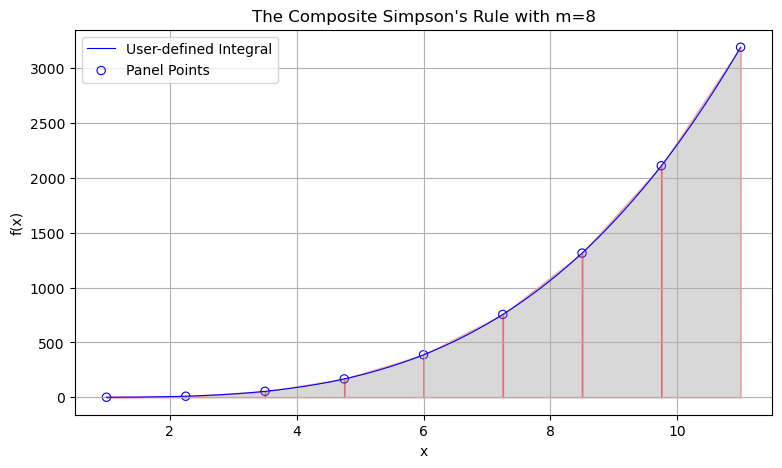

In [32]:
# ------------------------------------------------------------- PROBLEM DEFINITION ------------------------------------------------------------- #
# ---------------------------------------
# VALIDATION PROBLEMS
# ---------------------------------------
# lower_lim    = 1                         # integral lower limit
# upper_lim    = 6                         # integral upper limit
# panel_num    = 8                         # number of panels
# integral_def = "math.sqrt(5*x)+4/(x**2)" # string user-defined integral function

# lower_lim    = 1                       # integral lower limit
# upper_lim    = 2                       # integral upper limit
# panel_num    = 8                       # number of panels
# integral_def = "ln(x)"                 # string user-defined integral function

# lower_lim    = 0                       # integral lower limit
# upper_lim    = 4                       # integral upper limit
# panel_num    = 4                       # number of panels
# integral_def = "math.exp(x)"           # string user-defined integral function

# ---------------------------------------
# HOMEWORK PROBLEM
# ---------------------------------------
lower_lim    = 1                       # integral lower limit
upper_lim    = 11                      # integral upper limit
panel_num    = 8                       # number of panels
integral_def = "(x**3)*ln(x)"    # string user-defined integral function


# ---------------------------------------------------------- COMPOSITE SIMPSON'S RULE ---------------------------------------------------------- #
# ---------------------------------------
# MAIN LOOP
# ---------------------------------------
# Call main class
cs = compositeSimpsonRule(lim=[lower_lim,upper_lim],panel_num=panel_num,str_func=integral_def)
# Run main function
result_simpson = cs.simpson()

# ---------------------------------------
# POST-PROCESSING
# ---------------------------------------
# Screen print
cs.screen_print(result_exact = 7861.896172)

# Use quad to perform the numerical integration
result_quad = cs.quad_solution()
# Print the result
print(f"\nQUADPACK solution (Gauss-Quadrature Library): {result_quad:.6f}")
decimal_places_between_nums = cs.common_decimal_places(result_simpson,result_quad)
print(f"The number of decimal places between Simpson's rule {result_simpson:6f} and Quadpack {result_quad:.6f} is: {decimal_places_between_nums}")

# Plot the results
cs.plot_function()

# Reference(s)

- Composite Simpson's Rule Youtube Video Solved Problem (https://www.youtube.com/watch?v=CsOS9yZ_wv4)
- R. L. Burden and J. D. Faires, Numerical Analysis. The Prindle, Weber and Schmidt Series in Mathematics,
Boston: PWS-Kent Publishing Company, fourth ed., 1989.